<a href="https://colab.research.google.com/github/ignyz/Numerical-methods-and-algorithms/blob/main/L3_1_interpoliavimas_daugianariu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-3. -2. -1.  0.  1.  2.] X

[-2.91481457 -2.26776695 -1.14704761  0.14704761  1.26776695  1.91481457] XC

[[-7.31342548e-04]
 [-9.13551146e-02]
 [-1.47129365e+00]
 [-3.00000000e+00]
 [-7.35646823e-01]
 [-1.82710229e-02]] Y

[[-2.76864300e-02]
 [-3.47074721e-01]
 [-2.79192497e+00]
 [-1.11228310e+00]
 [-3.06478092e-02]
 [-1.19486908e-03]] YYC

B [-0.00073134 -0.09062377 -0.64465738  0.19009116  0.11672002 -0.10069287]
BC [-0.00073134 -0.14005735 -0.61729845  0.20837171  0.03844163 -0.05600999]


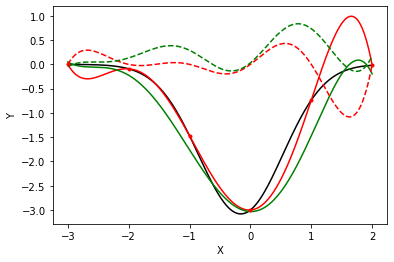

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy 
import math
import matplotlib.pyplot as plt
import time
import sympy as sym
from numpy import *
from matplotlib.pyplot import *

def Apsk(a, x, r):
    x.astype(float)
    n = len( a ) - 1
    fff = a[n]
    for i in range( n - 1, -1, -1 ):
        fff = fff * ( r - x[i] ) + a[i]
        #print(fff * ( r - x[i] ) + a[i])
    return fff

def f(x): 
  return (math.cos(math.radians(x**2)) * (x - 3))*(math.exp(-1*x**2))

def calculateDistance(x1,y1,x2,y2):  
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
  return dist  

xmin=-3.
xmax=2.
N = 6
n= N-1
deltax =calculateDistance(xmin,0,xmax,0) / (N-1) 
X=zeros(N)
XC=zeros(N, dtype=float)

Y=zeros(N)
YC=zeros(N, dtype=float)
xnow  = xmin
for ii in range(N):
  X[ii] = xnow
  Y[ii] = f(xnow)
  XC[ii] = ((xmax-xmin)/2)*math.cos(math.pi*(2*ii+1)/(2*N)) + (xmax+xmin)/2
  YC[ii] = f(XC[ii])
  xnow = xnow + deltax
Y = numpy.reshape(Y,(N,1))
YC = numpy.reshape(YC,(N,1))
XC = XC[::-1]
#YC = YCC[::-1]
print(X,"X\n")
print(XC,"XC\n") # tolygiu interpoliavimo tasku abscises
print(Y, "Y\n") # tolygiai paskirstytu interpoliavimo tasku ordinates
print(YC,"YYC\n") #

######### Niutono išraiška interpoliuojančiam daugianariui apskaičiuoti

F=zeros((N,N), dtype=float)
FC=zeros((N,N), dtype=float)
for i in range(0,N):
  F[i,0]=Y[i]
  FC[i,0]=Y[i]

for j in range(1,N):
  for i in range(j,N):
    F[i,j] = float(float(F[i,j-1]-F[i-1,j-1]) / float(X[i]-X[i-j]))
    FC[i,j] = float(float(FC[i,j-1]-FC[i-1,j-1]) / float(XC[i]-XC[i-j]))  
#print("F",F)
#print("FC",FC) 
b=zeros(N, dtype=float)
bc=zeros(N, dtype=float)
for i in range(0,N):
  b[i] = F[i,i]
  bc[i] = FC[i,i]
print("B",b)
print("BC",bc)
############ GRAFIKU PAISYMAS ##########
t = linspace(-3, 2, 5000)
z = linspace(-3, 2, N)
y0 = zeros(len(t))
y1 = zeros(len(t))
y2 =zeros(len(t))
d1 = zeros(len(t))
d2 = zeros(len(t))
p1 = zeros(len(z))
p2 = zeros(len(z))
for i in range(len(t)):
  y0[i] = f(t[i])
  y1[i] = Apsk(b,X,t[i])
  y2[i] = Apsk(bc,XC,t[i])
  d1[i] = y0[i] - y1[i]
  d2[i] = y0[i] - y2[i]
for i in range(len(z)):
  p1[i] = Apsk(b,X,X[i])
  p2[i] = Apsk(bc,XC,XC[i])
plot(t, y0, 'k-')
plot(t, y1, 'r-')
plot(t, y2, 'g-')
plot(t, d1, 'r--')
plot(t, d2, 'g--')
plot(z, p1, 'r.')
xlabel('X')
ylabel('Y')
#legend(['Duota funkcija exp(-x^3)*cos(x^2)*(x-3)', 'Interpoliavimas per tolygiai pasiskyrsciusius taskus','Interpoliavimas per Čiobyševo abscisės taškus'])
#title('Plotting two curves in the same plot')
show()